In [173]:
import pandas as pd 
import numpy as np 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import matplotlib.pyplot as plt
import keras

In [174]:

filepath = './Alzheimer_s Dataset/test/MildDemented/27.jpg'
img = Image.open(filepath)

print('width', img.width)
print('height', img.height)


width 176
height 208


In [175]:

def plott(folder):

    plt.figure(figsize=(4, 3))
    plt.axis('off')

    f = './Alzheimer_s Dataset/test/{}/27.jpg'.format(folder)
    image = imread(f)
    plt.imshow(image)



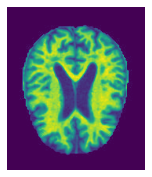

In [176]:
plott('MildDemented')

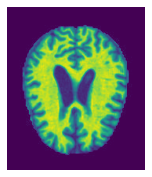

In [177]:
plott('ModerateDemented')

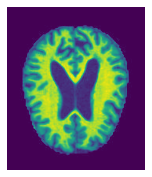

In [178]:
plott('NonDemented')

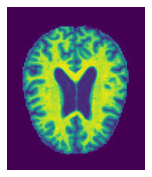

In [179]:
plott('VeryMildDemented')

In [4]:
train_datagen = ImageDataGenerator(rotation_range=15,
                                        zoom_range=0.2,
                                        vertical_flip=True,
                                        horizontal_flip=True,
                                        rescale=1/255)




validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        './Alzheimer_s Dataset/train/',
        shuffle=True,
        target_size=(208, 176),
        batch_size=32,
        class_mode='categorical',
        color_mode='rgb')

validation_generator = validation_datagen.flow_from_directory(
        './Alzheimer_s Dataset/test/',
        shuffle=True,
        target_size=(208, 176),
        batch_size=32,
        class_mode='categorical',
        color_mode='rgb')

Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


In [157]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(208, 176, 3),
    include_top=False,
    weights='imagenet')
                                               
for layer in base_model.layers:
  layer.trainable = False

last_layer = base_model.get_layer('block_4_add')
last_output = last_layer.output


from tensorflow.keras import Model


x = keras.layers.BatchNormalization()(last_output)

x = keras.layers.Conv2D(256, 3, activation='relu')(x)
x = keras.layers.Conv2D(256, 3, activation='relu')(x)
x = keras.layers.MaxPool2D(pool_size=(2, 2))(x)
x = keras.layers.BatchNormalization()(x)

x = keras.layers.Conv2D(512, 3, activation='relu')(x)
x = keras.layers.MaxPool2D(pool_size=(2, 2))(x)
x = keras.layers.BatchNormalization()(x)

x = keras.layers.Conv2D(512, 3, activation='relu')(x)
x = keras.layers.BatchNormalization()(x)

x = keras.layers.Flatten()(x)


x = keras.layers.Dense(1024, activation='relu')(x)
x = keras.layers.Dropout(0.4)(x)#
x = keras.layers.Dense(1024, activation='relu')(x)#
x = keras.layers.Dropout(0.4)(x)#

x = keras.layers.Dense(256, activation='relu')(x)
x = keras.layers.Dropout(0.2)(x)

x = keras.layers.Dense(128, activation='relu')(x)
x = keras.layers.Dropout(0.2)(x)


x = keras.layers.Dense(4, activation='softmax')(x)


model = Model(base_model.input, x)
model.summary()

Model: "model_55"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_68 (InputLayer)          [(None, 208, 176, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 104, 88, 32)  864         ['input_68[0][0]']               
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 104, 88, 32)  128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 104, 88, 32)  0           ['bn_Conv1[0][0]']        

In [158]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [159]:
history = model.fit(
      train_generator,  
      epochs=80,
      verbose=2,
      validation_data=validation_generator)

Epoch 1/80
161/161 - 33s - loss: 1.0189 - accuracy: 0.5118 - val_loss: 1.0998 - val_accuracy: 0.5051 - 33s/epoch - 205ms/step
Epoch 2/80
161/161 - 32s - loss: 0.9255 - accuracy: 0.5485 - val_loss: 0.9053 - val_accuracy: 0.5418 - 32s/epoch - 199ms/step
Epoch 3/80
161/161 - 34s - loss: 0.8824 - accuracy: 0.5591 - val_loss: 2.1223 - val_accuracy: 0.5035 - 34s/epoch - 209ms/step
Epoch 4/80
161/161 - 32s - loss: 0.8707 - accuracy: 0.5684 - val_loss: 0.8676 - val_accuracy: 0.5715 - 32s/epoch - 196ms/step
Epoch 5/80
161/161 - 31s - loss: 0.8361 - accuracy: 0.5813 - val_loss: 0.9177 - val_accuracy: 0.5770 - 31s/epoch - 191ms/step
Epoch 6/80
161/161 - 32s - loss: 0.8303 - accuracy: 0.5807 - val_loss: 0.8717 - val_accuracy: 0.5989 - 32s/epoch - 196ms/step
Epoch 7/80
161/161 - 31s - loss: 0.8093 - accuracy: 0.6018 - val_loss: 2.1791 - val_accuracy: 0.5113 - 31s/epoch - 195ms/step
Epoch 8/80
161/161 - 32s - loss: 0.7899 - accuracy: 0.6079 - val_loss: 1.3127 - val_accuracy: 0.5348 - 32s/epoch - 196

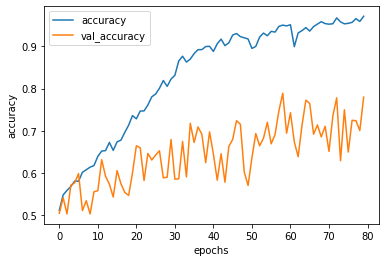

In [160]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['accuracy', 'val_accuracy'])

plt.show()

In [170]:
scores = model.evaluate(validation_generator)

40/40 [==============================] - 2s 40ms/step - loss: 1.2724 - accuracy: 0.7795


In [172]:
print('loss : ', scores[0])
print('accuracy : ', scores[1])

loss :  1.2723876237869263
accuracy :  0.779515266418457
